In [15]:
print("Hello Marketer")

Hello Marketer


# Controlling A Marketing Budget Campaign with a PID system

## Defining the Problem

 A marketing campaign is underway, that is going to use several inventory partners (Publishers), each with different click through rates (CTR) and cost per click. 
 
 This campaign optimises a bidding strategy for getting a maximun number of clicks (performance). 

### Defining and Simulating Inventory 

A series of publishers are modelled by:
 - The random number of impressions available for a particular publisher
 - The click through rate (CTR) (to start with, for the sake of simplification we asume it is constant for a given publisher) TODO: Make this dynamic
 - A cost per click (CPC) 


### Defining PID parameters by running multiple simulations

- What are the parameters that optimize for? Stability? 



How does it vary towards target?

2120 2337.499999999992
{'Google Search': -17.34, 'Facebook Ads': -75.58000000000001, 'Instagram': -5.980000000000001}
0 0
{'Google Search': 67.02, 'Facebook Ads': 23.340000000000003, 'Instagram': 75.53999999999999}
17060 18116.900000000234
{'Google Search': -359.67, 'Facebook Ads': -1227.6300000000003, 'Instagram': -802.6000000000001}
0 0
{'Google Search': -174.36, 'Facebook Ads': -840.8000000000003, 'Instagram': -503.54000000000013}
0 0
{'Google Search': -135.8, 'Facebook Ads': -857.1700000000003, 'Instagram': -492.53000000000014}
0 0
{'Google Search': -92.24000000000001, 'Facebook Ads': -868.5400000000003, 'Instagram': -476.52000000000015}
0 0
{'Google Search': -43.68000000000001, 'Facebook Ads': -874.9100000000003, 'Instagram': -455.51000000000016}
0 0
{'Google Search': 9.879999999999995, 'Facebook Ads': -876.2800000000003, 'Instagram': -429.50000000000017}
5920 8880.0
{'Google Search': -878.76, 'Facebook Ads': -872.6500000000003, 'Instagram': -398.4900000000002}
0 0
{'Google Search

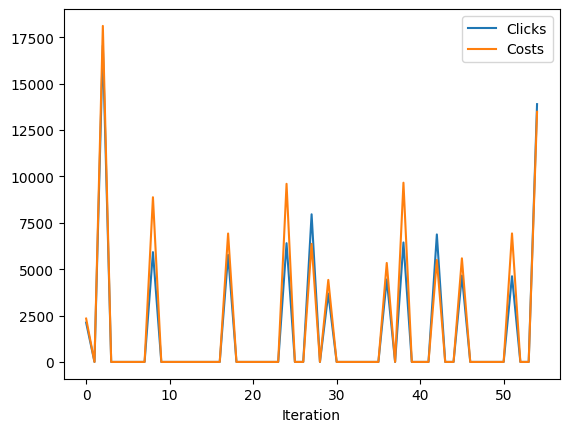

Total cost per click:  0.9701705158644647
Total clicks:  13899
Total cost:  13484.400000000194


In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Channel parameters (replace with your own values)
channels = {
    "Google Search": {"impressions": (5000, 2000), "ctr": 0.02, "cpc": 1.5},
    "Facebook Ads": {"impressions": (8000, 1500), "ctr": 0.015, "cpc": 0.8},
    "Instagram": {"impressions": (5000, 1000), "ctr": 0.03, "cpc": 1.2},
}

# Control parameters (initial values)
Kp = 0.1  
Ki = 0.01  
Kd = 0.05 

def pid_controller(error, prev_error, integral_error):
    integral_error += error
    derivative_error = error - prev_error
    return Kp * error + Ki * integral_error + Kd * derivative_error, integral_error, error

def simulate_channel(channel_data, bid, integral_error, prev_error):
    impressions = int(np.random.normal(*channel_data["impressions"]))
    clicks = 0
    cost = 0

    for _ in range(impressions):
        if random.random() < channel_data["ctr"] + bid:
            clicks += 1
            cost += channel_data["cpc"]

    error = target_clicks - clicks 
    bid_adjustment, integral_error, prev_error = pid_controller(error, prev_error, integral_error)
    new_bid = bid + bid_adjustment 

    return clicks, cost, new_bid, integral_error, prev_error

# Simulation parameters
total_budget = 100000
target_clicks = 500

# Simulation loop
results = []
remaining_budget = total_budget
bids = {channel: 0.1 for channel in channels}  # Initial bids
integral_errors = {channel: 0 for channel in channels}
prev_errors = {channel: 0 for channel in channels}

while remaining_budget > 0:
    total_clicks = 0
    total_cost = 0
    
    for channel, data in channels.items():
        clicks, cost, bids[channel], integral_errors[channel], prev_errors[channel] = simulate_channel(data, bids[channel], integral_errors[channel], prev_errors[channel])
        total_clicks += clicks
        total_cost += cost
    print(total_clicks, total_cost)
    # bid
    print(bids)
    results.append((total_clicks, total_cost))
    remaining_budget -= total_cost

# Plot results
clicks, costs = zip(*results)
plt.plot(clicks, label="Clicks")
plt.plot(costs, label="Costs")
plt.xlabel("Iteration")
plt.legend()
plt.show()

#plot total cost per click
print("Total cost per click: ", total_cost/total_clicks)
print("Total clicks: ", total_clicks)
print("Total cost: ", total_cost)



In [2]:
results

[(3001, 3567.2999999999943), (0, 0), (12467, 11328.400000000853)]

References:

Advertising optimisation problem and control 

CPM information: https://www.tunnldata.com/blog/how-hybrid-pricing-with-the-trade-desk-works

Optimization strategies https://partner.thetradedesk.com/v3/portal/api/doc/KoaOptimizations



